# Import packages and load params

In [1]:
import yaml
import sys
import os

## First go back up a folder 
import os
#os.chdir('..')
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
### notebook specific configuration ###
from os.path import basename
#mpl.style.use('ggplot')
mpl.style.use('fivethirtyeight')
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [2]:
meta_samples = pd.read_csv('meta_samples.csv',index_col=0)
meta_samples.head()

,Experiment,Full,Short,Short_with_number,Tissue
BMDMwt/GRO/f04_peaks/merge_bg_2.peak,GRO,/data/isshamie/TSS/Processed/BMDMwt/GRO/f04_pe...,BMDMwt_GRO,BMDMwt_GRO1,BMDMwt
Brain/GRO/f04_peaks/merge_bg_2.peak,GRO,/data/isshamie/TSS/Processed/Brain/GRO/f04_pea...,Brain_GRO,Brain_GRO1,Brain
Brain/mSTART/f04_peaks/merge_bg_2.peak,mSTART,/data/isshamie/TSS/Processed/Brain/mSTART/f04_...,Brain_mSTART,Brain_mSTART1,Brain
Heart/mSTART/f04_peaks/merge_bg_2.peak,mSTART,/data/isshamie/TSS/Processed/Heart/mSTART/f04_...,Heart_mSTART,Heart_mSTART1,Heart
Kidney/GRO/f04_peaks/merge_bg_2.peak,GRO,/data/isshamie/TSS/Processed/Kidney/GRO/f04_pe...,Kidney_GRO,Kidney_GRO1,Kidney


## Load Parameter file

In [3]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'



with open(parameter_file,'r') as f:
    doc = yaml.load(f)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
gff_f=doc['annotation']
annotation_gtf=doc['annotation_gtf']

RNA_dir = os.path.join(data_folder,'RNA_Total')



## Load Developing Modules

In [4]:
from Modules.Homer import *

In [5]:
sys.path.append('/data/isshamie/TSS/Analysis/src')
import helper

### Tissues with totalRNA

In [6]:
tissues_with_RNA = {
    'MiscOrgans': 'Misc',
    'FemaleReproductive':'ReproductiveTract',
    'Brain':'Brain',
    'Lung':'Lung',
    'Liver':'Liver',
    'Spleen':'Spleen',
    'Muscle':'Muscle'    
}

## Example Case here

In [7]:
t = 'CHO'
s = 'GRO'
out_dir = './'

In [8]:

gff_f = '/data/genome/hamster/picr/updated_final_sort.gff3'

# 5' file
raw_f = 'CHO-5GRO-SD371_S10_R1_001.fastq.gz'
trim_f = 'trim_CHO-5GRO-SD371_S10_R1_001.fastq.gz'
align_f = 'f02_bam/trim_CHO-5GRO-SD371_S10_R1_001.bam'
tag_f = 'copied/f03_tags/trim_CHO-5GRO-SD367_S6_R1_001.fastq'

# input file
in_raw_f = 'CHO-GRO-SD370_S9_R1_001.fastq.gz'
in_trim_f = 'trim_CHO-GRO-SD370_S9_R1_001.fastq.gz'
in_align_f = 'f02_bam/CHO-GRO-SD370_S9_R1_001.bam'
in_tag_f = 'copied/f03_tags/trim_CHO-GRO-SD370_S9_R1_001.fastq'

# findcsRNA

In [9]:
## Files for cs test

tss_tag = [tag_f]
inp_tag = [in_tag_f]
#rna_tag = []

In [10]:
i = tss_tag[0]
j = inp_tag[0]

out_name = '%s_%s_%s' % (t,os.path.basename(i),os.path.basename(j))
out_f = os.path.join(out_dir,out_name) #'Results/csRNATSS/%s_%s_%s' % (t,os.path.basename(i),os.path.basename(j))

# cs_cmd = 'findcsRNATSS.pl {start} -i {control} -rna {rna} -gtf {annotation_gtf} -genome ch -cpu 30 -o {out_f}'.format(
#     start=i,
#     control=j,
#     rna=rna_tag,
#     annotation_gtf=annotation_gtf,
#     out_f=out_f)

cs_cmd = 'findcsRNATSS.pl {start} -i {control} -gtf {annotation_gtf} -genome ch -cpu 30 -o {out_f}'.format(
    start=i,
    control=j,
    annotation_gtf=annotation_gtf,
    out_f=out_f)

In [11]:
print(cs_cmd)
!{cs_cmd}

findcsRNATSS.pl copied/f03_tags/trim_CHO-5GRO-SD367_S6_R1_001.fastq -i copied/f03_tags/trim_CHO-GRO-SD370_S9_R1_001.fastq -gtf /data/isshamie/genome/updated_final_sort.gtf -genome ch -cpu 30 -o ./CHO_trim_CHO-5GRO-SD367_S6_R1_001.fastq_trim_CHO-GRO-SD370_S9_R1_001.fastq
	Fragment Length = 1
	Finding tags on separate strands: doubling effective genome size
	Finding peaks of size 150, no closer than 300
		Finding peaks on picr_0 (minCount=39.9), total tags positions = 501308
		Finding peaks on picr_1 (minCount=39.9), total tags positions = 306579
		Finding peaks on picr_10 (minCount=39.9), total tags positions = 165310
		Finding peaks on picr_100 (minCount=39.9), total tags positions = 39888
		Finding peaks on picr_1000 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1002 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1005 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1006 (minCount=39.9), total tags positions = 58
		Finding peaks 

		Finding peaks on picr_1190 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1193 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1194 (minCount=39.9), total tags positions = 13
		Finding peaks on picr_1197 (minCount=39.9), total tags positions = 3
		Finding peaks on picr_12 (minCount=39.9), total tags positions = 140704
		Finding peaks on picr_120 (minCount=39.9), total tags positions = 105783
		Finding peaks on picr_1200 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_1201 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1202 (minCount=39.9), total tags positions = 20
		Finding peaks on picr_1209 (minCount=39.9), total tags positions = 62
		Finding peaks on picr_121 (minCount=39.9), total tags positions = 13525
		Finding peaks on picr_1210 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1211 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1215 (minCount=39.9), total tags positio

		Finding peaks on picr_140 (minCount=39.9), total tags positions = 17640
		Finding peaks on picr_1400 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1405 (minCount=39.9), total tags positions = 48
		Finding peaks on picr_1406 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1407 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_1408 (minCount=39.9), total tags positions = 9
		Finding peaks on picr_141 (minCount=39.9), total tags positions = 6729
		Finding peaks on picr_1411 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_1415 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_1416 (minCount=39.9), total tags positions = 9
		Finding peaks on picr_1417 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1419 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_142 (minCount=39.9), total tags positions = 11138
		Finding peaks on picr_1420 (minCount=39.9), total tags positions =

		Finding peaks on picr_170 (minCount=39.9), total tags positions = 3235
		Finding peaks on picr_1701 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1702 (minCount=39.9), total tags positions = 3
		Finding peaks on picr_1705 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_171 (minCount=39.9), total tags positions = 5939
		Finding peaks on picr_1711 (minCount=39.9), total tags positions = 7
		Finding peaks on picr_1713 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1714 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1716 (minCount=39.9), total tags positions = 3
		Finding peaks on picr_1717 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1718 (minCount=39.9), total tags positions = 13
		Finding peaks on picr_172 (minCount=39.9), total tags positions = 4940
		Finding peaks on picr_1721 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_1726 (minCount=39.9), total tags positions = 1

		Finding peaks on picr_241 (minCount=39.9), total tags positions = 10
		Finding peaks on picr_242 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_243 (minCount=39.9), total tags positions = 7
		Finding peaks on picr_244 (minCount=39.9), total tags positions = 3
		Finding peaks on picr_245 (minCount=39.9), total tags positions = 6
		Finding peaks on picr_246 (minCount=39.9), total tags positions = 80
		Finding peaks on picr_247 (minCount=39.9), total tags positions = 3
		Finding peaks on picr_248 (minCount=39.9), total tags positions = 49
		Finding peaks on picr_249 (minCount=39.9), total tags positions = 5
		Finding peaks on picr_25 (minCount=39.9), total tags positions = 30912
		Finding peaks on picr_250 (minCount=39.9), total tags positions = 319
		Finding peaks on picr_251 (minCount=39.9), total tags positions = 15
		Finding peaks on picr_253 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_254 (minCount=39.9), total tags positions = 10
		Finding 

		Finding peaks on picr_370 (minCount=39.9), total tags positions = 13
		Finding peaks on picr_371 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_372 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_373 (minCount=39.9), total tags positions = 7
		Finding peaks on picr_374 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_375 (minCount=39.9), total tags positions = 215
		Finding peaks on picr_376 (minCount=39.9), total tags positions = 5
		Finding peaks on picr_377 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_378 (minCount=39.9), total tags positions = 1039
		Finding peaks on picr_379 (minCount=39.9), total tags positions = 16
		Finding peaks on picr_38 (minCount=39.9), total tags positions = 121731
		Finding peaks on picr_380 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_382 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_383 (minCount=39.9), total tags positions = 2
		Finding

		Finding peaks on picr_50 (minCount=39.9), total tags positions = 127117
		Finding peaks on picr_501 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_502 (minCount=39.9), total tags positions = 7
		Finding peaks on picr_504 (minCount=39.9), total tags positions = 93
		Finding peaks on picr_505 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_51 (minCount=39.9), total tags positions = 55365
		Finding peaks on picr_510 (minCount=39.9), total tags positions = 5
		Finding peaks on picr_511 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_512 (minCount=39.9), total tags positions = 11
		Finding peaks on picr_513 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_514 (minCount=39.9), total tags positions = 4
		Finding peaks on picr_515 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_516 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_518 (minCount=39.9), total tags positions = 4
		Finding p

		Finding peaks on picr_660 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_661 (minCount=39.9), total tags positions = 3
		Finding peaks on picr_663 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_664 (minCount=39.9), total tags positions = 133
		Finding peaks on picr_665 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_667 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_668 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_669 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_67 (minCount=39.9), total tags positions = 26698
		Finding peaks on picr_670 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_671 (minCount=39.9), total tags positions = 367
		Finding peaks on picr_673 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_675 (minCount=39.9), total tags positions = 25
		Finding peaks on picr_676 (minCount=39.9), total tags positions = 3
		Finding pe

		Finding peaks on picr_831 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_833 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_834 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_835 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_836 (minCount=39.9), total tags positions = 1
		Finding peaks on picr_837 (minCount=39.9), total tags positions = 9
		Finding peaks on picr_838 (minCount=39.9), total tags positions = 6
		Finding peaks on picr_84 (minCount=39.9), total tags positions = 57844
		Finding peaks on picr_840 (minCount=39.9), total tags positions = 5
		Finding peaks on picr_843 (minCount=39.9), total tags positions = 267
		Finding peaks on picr_844 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_845 (minCount=39.9), total tags positions = 2
		Finding peaks on picr_848 (minCount=39.9), total tags positions = 9
		Finding peaks on picr_849 (minCount=39.9), total tags positions = 2
		Finding peaks

	55778 peaks passed threshold
	Local Background Filtering: 54256 of 55778 (97.27% passed)
	Total Peaks identified = 54256
	Centering peaks of size 150 using a fragment length of 1
	Analysing TSS initiation patterns 150
	Features that will be considered:
		exon

	868909 lines contained useful feature information
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 86585
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 86585
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 86585
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 86585
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with 

	Annotating:...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
		Annotation	Number of peaks	Total size (bp)	Log2 Enrichment
		TTS	172002.0	46722584	2.221
		Exon	768796.0	89316480	3.44

Segmentation fault (core dumped)
	Could not find basic annotation file (0.572275255647586.2.tmp)
	Counting Tags in Peaks from each directory...
	Ratio for copied/f03_tags/trim_CHO-5GRO-SD367_S6_R1_001.fastq : 0.37632527178117
	Ratio for copied/f03_tags/trim_CHO-GRO-SD370_S9_R1_001.fastq : 0.478662998512555
	Organism: null
	Loading Gene Informaiton...
readline() on closed filehandle IN at /home/isshamie/software/homer/bin//annotatePeaks.pl line 3723.
readline() on closed filehandle IN at /home/isshamie/software/homer/bin//annotatePeaks.pl line 3733.
	Outputing Annotation File...
	Done annotating peaks file


	MaxDiff [0] = 0.054336112207846
	Threshold [0] = 1.56069583592847

	Difference in distributions is too small: setting fold enrichment to default
Set	Total TSS
total	54256
valid TSS	44933
total over input	44933
 under RNA	0
 valid Annotation: 43105
 exon Annotation: 1828
Total input	9323
log2 fold vs. input: 1
log2 fold vs. rna: -10000000000
Number of TSS regions for foldChange Calc

# Load Results

In [13]:
tss = pd.read_csv(out_f + '.tss.txt'
                 ,sep='\t',index_col = 0)


print(tss.shape)
tss.head()

(44933, 16)


,chr,start,end,strand,score,focusRatio,csRNA,csRNAinput,rnaseq,annotation,Log2Ratio vs. Input,Log2Ratio vs. RNA,rev-csRNA,rev-csRNAinput,rev-RNA,BidirectionalRatio
#tssID,,,,,,,,,,,,,,,,
picr_56-1,picr_56,12601780,12601930,+,39599.6,0.920,39593.56,4254.36,na,other,3.215833,na,94.83,15.32,na,8.589152
picr_160-1,picr_160,705573,705723,+,8873.0,0.891,8869.99,3488.02,na,tssAntisense,1.344520,na,1.13,0.00,na,9.925403
picr_13-1,picr_13,30535313,30535463,+,8220.4,0.886,7942.72,2434.96,na,tssAntisense,1.702455,na,64.73,11.97,na,6.772391
picr_117-1,picr_117,4328685,4328835,-,7374.5,0.991,7374.47,2314.81,na,other,1.668232,na,6.77,3.35,na,8.965290
picr_56-2,picr_56,12627307,12627457,+,6395.6,0.929,6395.27,980.78,na,other,2.695087,na,23.33,0.48,na,7.675120


In [14]:
exon = pd.read_csv(out_f + '.annexons.txt'
                 ,sep='\t', index_col = 0)
print(exon.shape)
exon.head()

(1828, 16)


,chr,start,end,strand,score,focusRatio,csRNA,csRNAinput,rnaseq,annotation,Log2Ratio vs. Input,Log2Ratio vs. RNA,rev-csRNA,rev-csRNAinput,rev-RNA,BidirectionalRatio
#tssID,,,,,,,,,,,,,,,,
picr_73-1,picr_73,10471,10621,-,3520.9,0.420,3517.89,691.19,na,otherExon,2.334231,na,689.05,135.94,na,2.338653
picr_35-2,picr_35,691478,691628,-,3402.7,0.864,3400.85,252.73,na,otherExon,3.708657,na,709.37,84.72,na,2.248496
picr_192-1,picr_192,18377,18527,-,2818.7,0.498,2814.54,570.09,na,otherExon,2.287628,na,1271.60,229.28,na,1.141301
picr_74-2,picr_74,4315316,4315466,+,2781.4,0.960,2781.42,541.37,na,otherExon,2.344115,na,254.02,62.23,na,3.412216
picr_4-3,picr_4,26272396,26272546,+,2437.5,0.967,2437.46,708.90,na,otherExon,1.770262,na,229.93,39.25,na,3.361497


In [15]:
anntss = pd.read_csv(out_f + '.anntss.txt'
                 ,sep='\t', index_col = 0)
print(anntss.shape)
anntss.head()

(43105, 16)


,chr,start,end,strand,score,focusRatio,csRNA,csRNAinput,rnaseq,annotation,Log2Ratio vs. Input,Log2Ratio vs. RNA,rev-csRNA,rev-csRNAinput,rev-RNA,BidirectionalRatio
#tssID,,,,,,,,,,,,,,,,
picr_56-1,picr_56,12601780,12601930,+,39599.6,0.920,39593.56,4254.36,na,other,3.215833,na,94.83,15.32,na,8.589152
picr_160-1,picr_160,705573,705723,+,8873.0,0.891,8869.99,3488.02,na,tssAntisense,1.344520,na,1.13,0.00,na,9.925403
picr_13-1,picr_13,30535313,30535463,+,8220.4,0.886,7942.72,2434.96,na,tssAntisense,1.702455,na,64.73,11.97,na,6.772391
picr_117-1,picr_117,4328685,4328835,-,7374.5,0.991,7374.47,2314.81,na,other,1.668232,na,6.77,3.35,na,8.965290
picr_56-2,picr_56,12627307,12627457,+,6395.6,0.929,6395.27,980.78,na,other,2.695087,na,23.33,0.48,na,7.675120


# Visualize

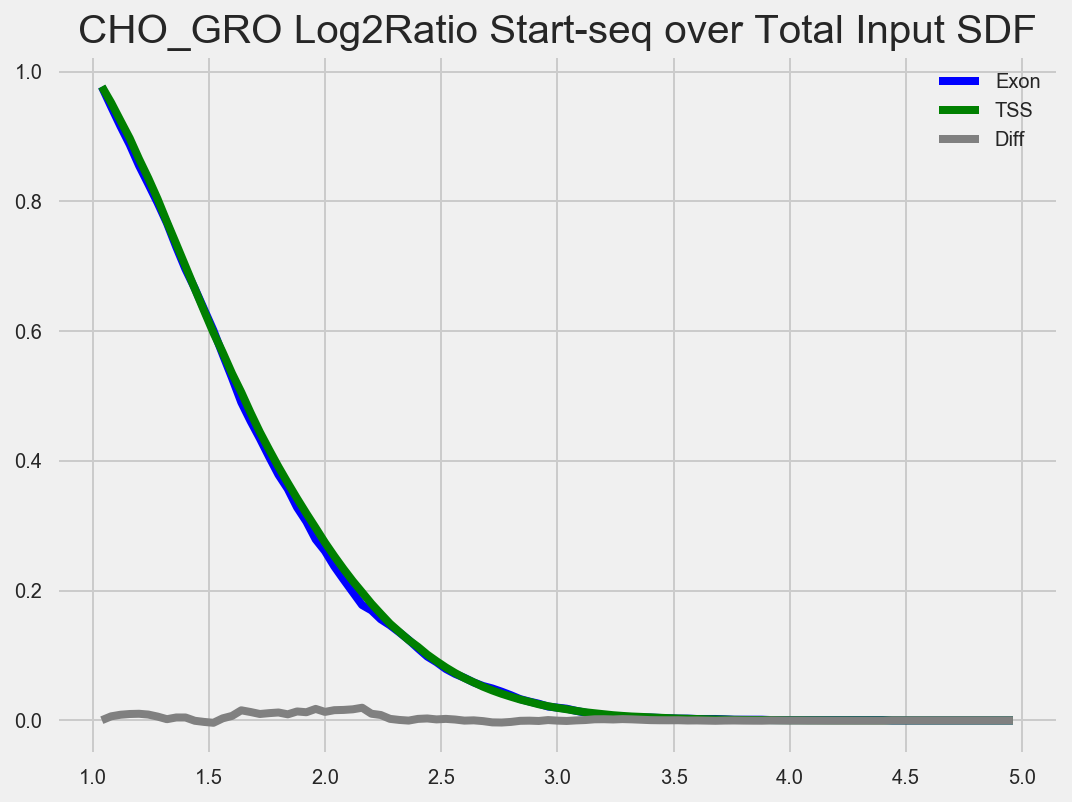

In [19]:
f = plt.figure()

## Setup bin edges
num_bins = 100
concat = np.concatenate((np.array(exon['Log2Ratio vs. Input']),np.array(tss['Log2Ratio vs. Input'])))
step = np.ceil(np.ceil(concat.max()) - np.floor(concat.min()))/num_bins
bins = np.arange(np.floor(concat.min()),np.ceil(concat.max()),step)

## Exon tss
counts_exon, bin_edges = np.histogram (exon['Log2Ratio vs. Input'], bins=bins, density=True)
cdf_exon = np.cumsum(counts_exon)
cdf_exon = cdf_exon/cdf_exon[-1]
sdf_exon = 1-cdf_exon
plt.plot(bin_edges[1:], sdf_exon,label='Exon')

## TSS tss
counts_tss, bin_edges = np.histogram (tss['Log2Ratio vs. Input'], bins=bins, density=True)
cdf_tss = np.cumsum(counts_tss)
cdf_tss = cdf_tss/cdf_tss[-1]
sdf_tss = 1-cdf_tss
plt.plot(bin_edges[1:], sdf_tss,color='g',label='TSS')

plt.plot(bin_edges[1:],sdf_tss-sdf_exon,color='gray',label='Diff')


plt.legend();
name = t + '_' + s
plt.title(name + ' Log2Ratio Start-seq over Total Input SDF' );
